# Nueva sección

In [2]:
import pandas as pd
import numpy as np

# Define las columnas del DataFrame
columnas = ['Apellido', 'Nombre', 'nro_dni', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases']

# Crea una lista de nombres y apellidos ficticios
nombres = ['Juan', 'María', 'Pedro', 'Ana', 'Luis', 'Sofía', 'José', 'Laura', 'Diego', 'Carla']
apellidos = ['Pérez', 'González', 'Rodríguez', 'Fernández', 'López', 'García', 'Martínez', 'Sánchez', 'Romero', 'Torres']

# Crea una lista de materias de educación secundaria en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Biología', 'Física', 'Química', 'Inglés', 'Educación Física', 'Arte']

# Crea un DataFrame vacío
df = pd.DataFrame(columns=columnas)

# Genera 100 filas de datos aleatorios
for i in range(100):
  # Genera datos aleatorios para cada columna
  apellido = np.random.choice(apellidos)
  nombre = np.random.choice(nombres)
  nro_dni = np.random.randint(10000000, 99999999)
  materia = np.random.choice(materias)
  nota_1er_trimestre = np.random.randint(1, 10)
  nota_2do_trimestre = np.random.randint(1, 10)
  nota_3er_trimestre = np.random.randint(1, 10)
  faltas_a_clases = np.random.randint(0, 30)

  # Agrega una fila al DataFrame
  df.loc[len(df)] = [apellido, nombre, nro_dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas_a_clases]

# Muestra el DataFrame
df

,Apellido,Nombre,nro_dni,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Martínez,Luis,89404045,Química,5,3,9,19
1,Martínez,Carla,15955822,Historia,5,1,6,4
2,Fernández,Ana,60773423,Educación Física,2,9,8,18
3,González,Pedro,81870218,Educación Física,1,6,7,22
4,Rodríguez,Ana,24317895,Historia,6,9,9,28
...,...,...,...,...,...,...,...,...
95,Romero,María,39257797,Inglés,3,8,7,4
96,González,José,14778864,Lengua y Literatura,9,3,5,28
97,García,Pedro,81658254,Física,5,3,5,13
98,Pérez,Laura,51195027,Matemática,1,4,4,0


<ipython-input-3-705e12542cf0>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(materias_ordenadas, rotation=45, ha='right')  # Rotar etiquetas del eje x


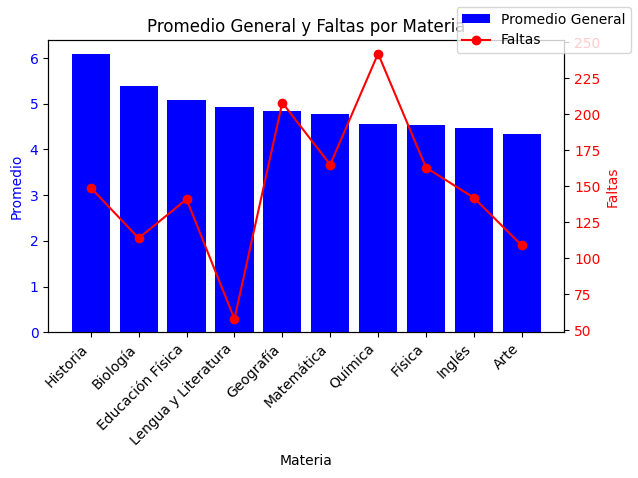

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos del DataFrame (Asumo que ya tienes el DataFrame 'df' creado en la respuesta anterior)

# Calcular el promedio general de cada materia
promedios_materias = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Calcular las faltas totales por materia
faltas_materias = df.groupby('Materia')['Faltas a clases'].sum()

# Ordenar las materias por promedio de mayor a menor
materias_ordenadas = promedios_materias.sort_values(ascending=False).index

# Crear el gráfico de barras
fig, ax1 = plt.subplots()

# Barras para los promedios
ax1.bar(materias_ordenadas, promedios_materias[materias_ordenadas], color='blue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='blue')
ax1.tick_params('y', labelcolor='blue')
ax1.set_xticklabels(materias_ordenadas, rotation=45, ha='right')  # Rotar etiquetas del eje x

# Segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(materias_ordenadas, faltas_materias[materias_ordenadas], color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params('y', labelcolor='red')

# Leyenda
fig.legend(loc='upper right')

# Título
plt.title('Promedio General y Faltas por Materia')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()